# 다항회귀분석  
앞에서 살펴본 단순회귀분석은 두 변수간의 관계를 **직선 형태** 로 설명하는 알고리즘  

**다항 함수** 를 사용하면 보다 복잡한 **곡선 형태** 의 회귀선을 표현할 수 있음

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# Load data

In [2]:
df = pd.read_csv('../002/auto-mpg.csv', header=None)

# Exploratory Data Analysis

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


데이터의 컬럼명이 없으므로 수정해줌

In [4]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

### 데이터 자료형 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### 데이터 결측치 확인

In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

### 데이터 통계 요약정보 확인

In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## 컬럼 전체의 고유값 확인

In [8]:
for i in range(len(df.columns.values)):
    print(df.columns.values[i])
    print(df[df.columns.values[i]].unique())
    print()

mpg
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

cylinders
[8 4 6 3 5]

displacement
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262

### horsepower 컬럼에서 "?"라는 이상한값 처리해주기

In [9]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

## 다항식 변환

다항회귀분석은 2차함수 이상의 다함함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘  
예를 들어 2차함수는 y = aX^2 + bX + c로 표시할 수 있으며, 학습을 통해 3개의 계수 a, b, c를 찾아서 모델을 완성함

PolynomialFeatures(degree=x)

x는 차수를 의미

In [10]:
X=df[['weight']]  #독립 변수 X
y=df['mpg']       #종속 변수 Y

#### 2차항 적용

In [11]:
poly = PolynomialFeatures(degree=2)

#### X 데이터를 2차항으로 변형

In [12]:
X = poly.fit_transform(X)

### train data 와 test data로 구분(7:3 비율)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#### 데이터 형태 보기

In [14]:
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


### train data를 가지고 모델 학습

In [15]:
pr = LinearRegression()
pr.fit(X_train, y_train)

LinearRegression()

## 모델 정확도 보기

In [16]:
r_square = pr.score(X_test,y_test)
print(r_square)

0.708700926297548


#### train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 

In [22]:
y_hat_test = pr.predict(X_test)

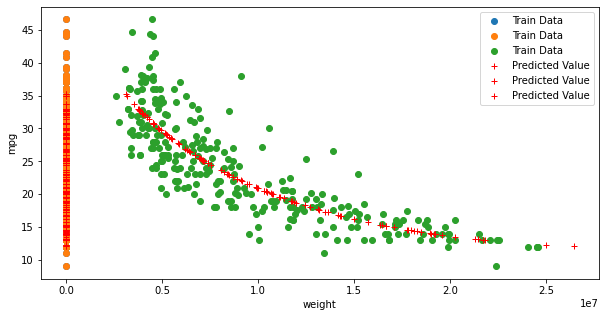

In [23]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()